# Assignment 1 (APL745) { Mohit Garg ; 2020AM10657}

# Imports and defining methods
Importing required libraries (numpy and matplotlib) and defined functions for Forward Difference , Backward Difference & Central Difference methods

In [267]:
from matplotlib import pyplot as plt
import numpy as np

def forward_differnce(x,i,e):
    y = []
    for j in range(len(x)):
        y.append(x[j])
    y[i]+=e
    return (f(y) - f(x))/e
def backward_differnce(x,i,e):
    y = []
    for j in range(len(x)):
        y.append(x[j])
    y[i]-=e
    return (f(x) - f(y))/e
def central_differnce(x,i,e):
    y = []
    for j in range(len(x)):
        y.append(x[j])
    z = []
    for j in range(len(x)):
        z.append(x[j])    
    y[i]+=0.5*e
    z[i]-=0.5*e
    return (f(y) - f(z))/e

# Question 1 
First we defined f(x) and Analytic gradient of x given.

In [268]:

def f(x):
    return 12.069*x[0]**2 + 21.504*x[1]**2 - 1.7321*x[0] - x[1]

def Analytic_gradient(x):
    return [24.138*x[0] - 1.7321 , 43.008*x[1] - 1]


Check at given point values for gradient calculated theoritically and estimation using 3 methods

In [269]:
Xo = np.array([5,6])
ew = 0.01
ag = Analytic_gradient(Xo)
fw = [forward_differnce(Xo,i,ew) for i in range(2)]
bw = [backward_differnce(Xo,i,ew) for i in range(2)]
cw = [central_differnce(Xo,i,ew) for i in range(2)]

print("Gradient using Forward difference method is",fw)
print("Gradient using Backward difference method is",bw)
print("Gradient using Central difference method is",cw)
print("Analytic Gradient is",ag)

Gradient using Forward difference method is [119.07858999998098, 257.263039999998]
Gradient using Backward difference method is [118.83721000001515, 256.832959999997]
Gradient using Central difference method is [118.95790000000943, 257.0479999999634]
Analytic Gradient is [118.95790000000001, 257.048]


Define a function which calculates error in value calculated by 3 methods given value of epsilon

In [270]:
def error(e):
    xo = np.array([5,6])
    g = Analytic_gradient(xo)
    ans = []
    f =0
    b =0
    c = 0
    for i in range(len(xo)):
        f+=(abs(g[i] - forward_differnce(xo,i,e)))**2
        b+=(abs(g[i] - backward_differnce(xo,i,e)))**2
        c+=(abs(g[i] - central_differnce(xo,i,e)))**2
    return [np.sqrt(f),np.sqrt(b),np.sqrt(c)]



Define epsilon on log scale as it is difficult to analyze error on linear scale and calculated error for given set of epsilon values. Also calculate respective errors at given set of values of epsilon

In [271]:
epsilons = np.logspace(-8, -1, 200)
F = []
B = []
C = []
for ep in epsilons:
    temp = error(ep)
    F.append(temp[0])
    B.append(temp[1])
    C.append(temp[2])
e_f = np.min(F)
e_b = np.min(B)
e_c = np.min(C)
e_ = 0.01 * np.min(Xo)
print(f"The minimum errors in 3 methods are {e_f},{e_b},{e_c} while 0.01*x is {e_}" )

The minimum errors in 3 methods are 2.228932628297276e-07,1.6264745508976008e-06,4.0194366942304643e-13 while 0.01*x is 0.05


# Plotting

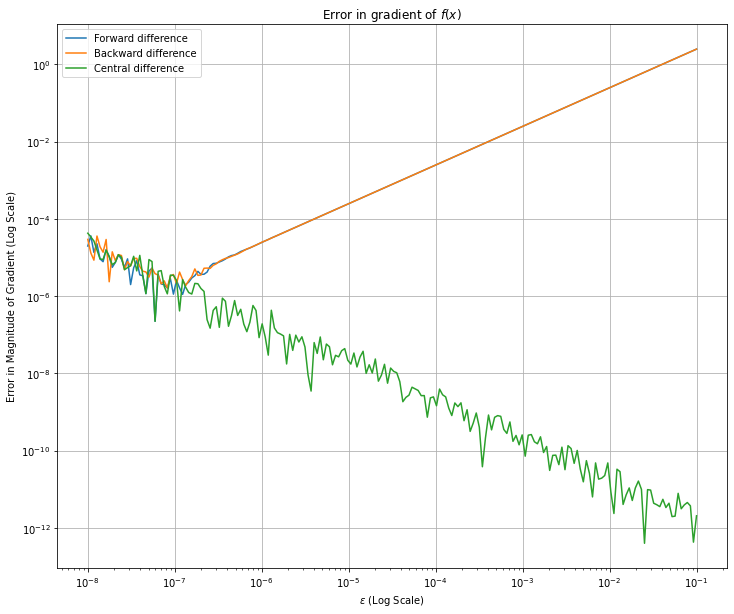

In [272]:
plt.figure(figsize=(12, 10))
plt.loglog(epsilons, F, label="Forward difference")
plt.loglog(epsilons, B, label="Backward difference")
plt.loglog(epsilons, C, label="Central difference")
plt.xlabel("$\epsilon$ (Log Scale)")
plt.ylabel("Error in Magnitude of Gradient (Log Scale)")
plt.title("Error in gradient of $f(x)$")
plt.grid()
plt.legend()
plt.savefig("p1.jpg")

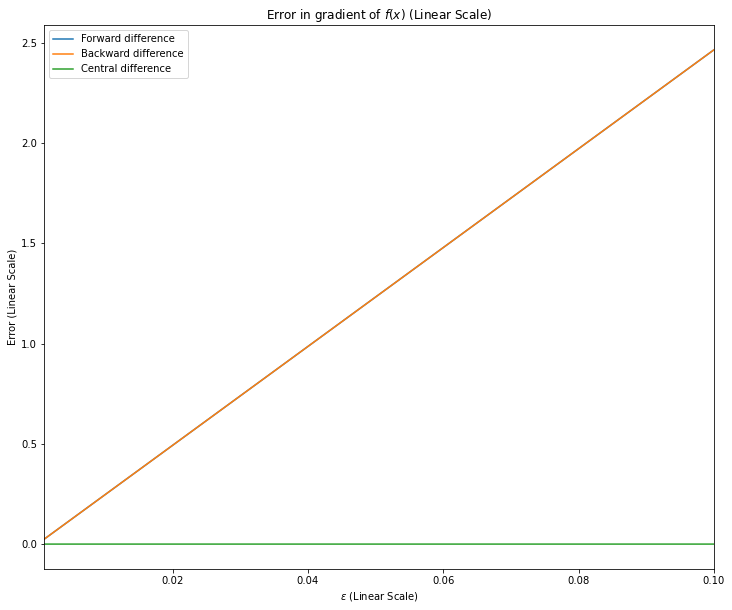

In [273]:
plt.figure(figsize=(12, 10))
plt.plot(epsilons, F, label="Forward difference")
plt.plot(epsilons, B, label="Backward difference")
plt.plot(epsilons, C, label="Central difference")
plt.xlabel("$\epsilon$ (Log Scale)")
plt.ylabel("Error in Magnitude of Gradient (Log Scale)")
plt.title("Error in gradient of $f(x)$")
plt.legend()

plt.xlim(1e-3, epsilons.max())
plt.xlabel("$\epsilon$ (Linear Scale)")
plt.ylabel("Error (Linear Scale)")
plt.title("Error in gradient of $f(x)$ (Linear Scale)")
plt.savefig("p_1.jpg")

# Question 2

In [274]:
def f(x):
    return (4*x[1]**2 - x[0]*x[1])/(1000*(x[1]*x[0]**3 - x[0]**4))

def Analytic_gradient(x):
    x1 = x[0]
    x2 = x[1]
    n1 = -(3*x2*(x1**2-6*x2*x1+4*x2**2))
    n2 = (1000*x1**4*(x1-x2)**2)
    t1 = n1/(n2+1e-15)

    n_1 = (4*x2**2-8*x1*x2+x1**2)
    n_2 = (1000*x1**3*(x2-x1)**2)
    t2 = n_1/(n_2+1e-15)

    return np.array([t1, t2])


In [275]:
Xo = np.array([0.5,1.5])
ew = 0.01
ag = Analytic_gradient(Xo)
fw = [forward_differnce(Xo,i,ew) for i in range(2)]
bw = [backward_differnce(Xo,i,ew) for i in range(2)]
cw = [central_differnce(Xo,i,ew) for i in range(2)]

print("Gradient using Forward difference method is",fw)
print("Gradient using Backward difference method is",bw)
print("Gradient using Central difference method is",cw)
print("Analytic Gradient is",ag)

    

Gradient using Forward difference method is [-0.3292731919233058, 0.02605940594059275]
Gradient using Backward difference method is [-0.35557830226494447, 0.02593939393939343]
Gradient using Central difference method is [-0.34210637168240604, 0.025999849996249935]
Analytic Gradient is [-0.342  0.026]


In [276]:
def error(e):
    xo = np.array([0.5,1.5])
    g = Analytic_gradient(xo)
    ans = []
    f =0
    b =0
    c = 0
    for i in range(len(xo)):
        f+=(abs(g[i] - forward_differnce(xo,i,e)))**2
        b+=(abs(g[i] - backward_differnce(xo,i,e)))**2
        c+=(abs(g[i] - central_differnce(xo,i,e)))**2
    return [np.sqrt(f),np.sqrt(b),np.sqrt(c)]



In [277]:
epsilons = np.logspace(-8, -1, 200)
F = []
B = []
C = []
for ep in epsilons:
    temp = error(ep)
    F.append(temp[0])
    B.append(temp[1])
    C.append(temp[2])
e_f = np.min(F)
e_b = np.min(B)
e_c = np.min(C)
e_ = 0.01 * np.min(Xo)
print(f"The minimum errors in 3 methods are {e_f},{e_b},{e_c} while 0.01*x is {e_}" )    

The minimum errors in 3 methods are 1.3487088821310805e-08,1.3046586082866586e-08,4.777863334339793e-12 while 0.01*x is 0.005


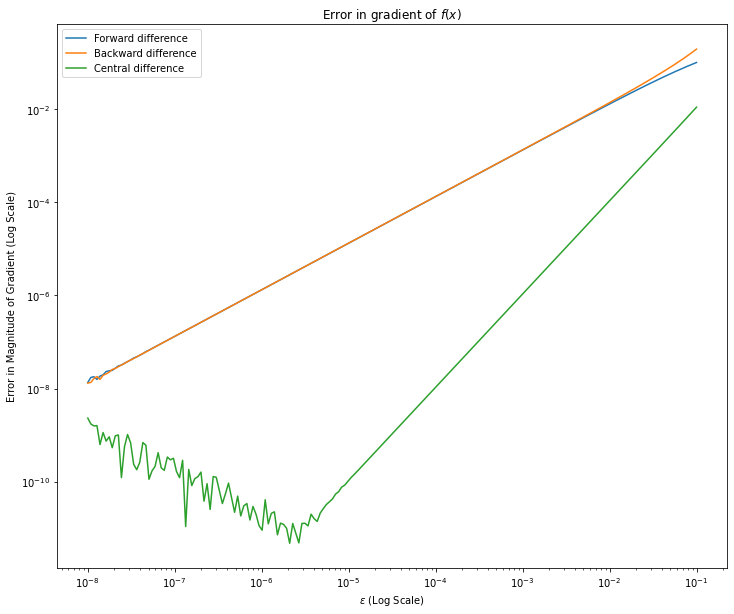

In [278]:
plt.figure(figsize=(12, 10))
plt.loglog(epsilons, F, label="Forward difference")
plt.loglog(epsilons, B, label="Backward difference")
plt.loglog(epsilons, C, label="Central difference")
plt.xlabel("$\epsilon$ (Log Scale)")
plt.ylabel("Error in Magnitude of Gradient (Log Scale)")
plt.title("Error in gradient of $f(x)$")
plt.legend()
plt.savefig("p2.jpg")

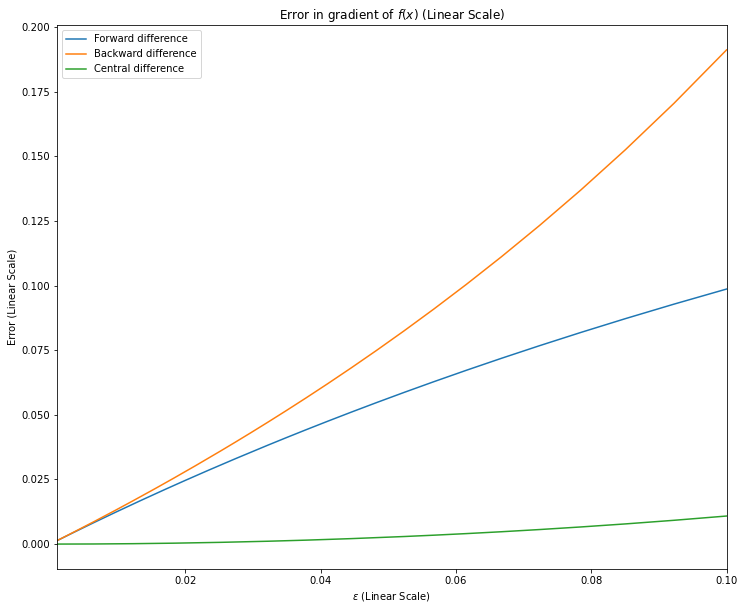

In [279]:
plt.figure(figsize=(12, 10))
plt.plot(epsilons, F, label="Forward difference")
plt.plot(epsilons, B, label="Backward difference")
plt.plot(epsilons, C, label="Central difference")
plt.xlabel("$\epsilon$ (Log Scale)")
plt.ylabel("Error in Magnitude of Gradient (Log Scale)")
plt.title("Error in gradient of $f(x)$")
plt.legend()

plt.xlim(1e-3, epsilons.max())
plt.xlabel("$\epsilon$ (Linear Scale)")
plt.ylabel("Error (Linear Scale)")
plt.title("Error in gradient of $f(x)$ (Linear Scale)")
plt.savefig("p_2.jpg")